In [1]:
import numpy as np
from scipy.io import loadmat
from scipy.fftpack import fft
from scipy.signal import welch
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns
sns.set_style("whitegrid")

/home/marto/.local/lib/python3.5/site-packages/matplotlib/__init__.py:913: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [ ]:
# Funciones auxiliares para levantar data
def armarNombre(x):
    c = 'S' if x < 11 else 'P'
    x = (x-1)%10+1
    return str(c) + ("" if x == 10 else "0") + str(x)

def armarNombreArchivo(c, x):
    return "data/" + str(c) + ("" if x == 10 else "0") + str(x) + ".mat"

In [46]:
# Funcion auxiliar para pasar valores de frecuencia a bines
#    Delta < 4 Hz
#    4 Hz <= Theta < 8 Hz
#    8 Hz <= Alpha < 13 Hz
#    13 Hz <= Beta < 30 Hz
#    30 Hz <= Gamma < Nyquist

def nombre_banda(x):
    if x < 4:
        return 'Delta'
    elif x < 8:
        return 'Theta'
    elif x < 13:
        return 'Alpha'
    elif x < 30:
        return 'Beta'
    else:
        return 'Gamma'
    





def bin_de_frecuencia(x):
    if x < 4.:
        return 0
    elif x < 8.:
        return 1
    elif x < 13.:
        return 2
    elif x < 30.:
        return 3
    else:
        return 4
    
def agrupar_por_bines(potencias, frecuencias):
    res = np.zeros(5)
    for i in range(len(potencias)):
        res[bin_de_frecuencia(frecuencias[i])] += potencias[i]
    return res

In [20]:
pacientes_raw = {}
for f in os.listdir('./data'):
    fname = "./data/"+f 
    print(f[:-4] + ' -- cargado')
    pacientes_raw[f[:-4]] = (loadmat(fname)['data'])
    

P01 -- cargado
S10 -- cargado


In [29]:
welches = {}
coso = []
for paciente in pacientes_raw:
    for epoch in pacientes_raw[paciente]:
        for electrodo in epoch:
            welches[paciente] = welch(electrodo,fs= 201/1.54)
            #print('hice algo')
            coso = welches[paciente]
            break
        break
    break

/home/marto/.local/lib/python3.5/site-packages/scipy/signal/spectral.py:1633: UserWarning: nperseg = 256 is greater than input length  = 201, using nperseg = 201
  .format(nperseg, input_length))


{'Gamma': 53, 'Delta': 6, 'Theta': 5, 'Beta': 25, 'Alpha': 7}


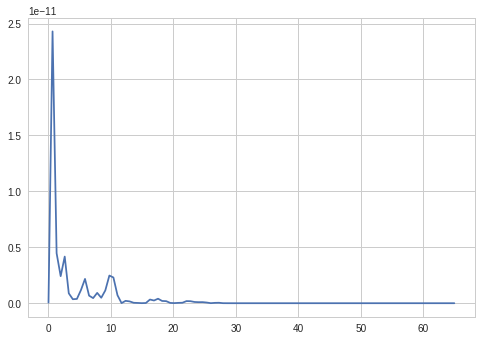

In [51]:
plt.plot(coso[0],coso[1])
bandas = {}
for c in coso[0]:
    b = nombre_banda(c) 
    try:
        bandas[b] += 1 
    except KeyError:
        bandas[b] = 0
print(bandas)
plt.show()